In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("facebook_ads_data (2.0).csv")
df.head(5)

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


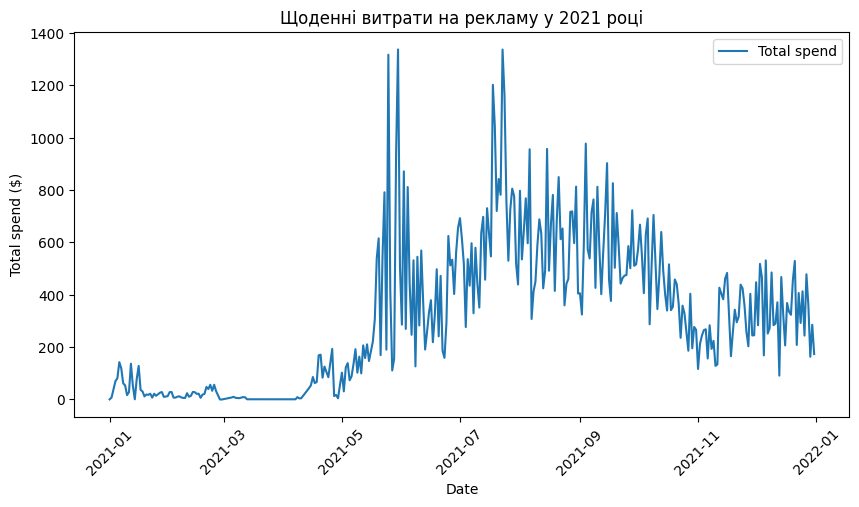

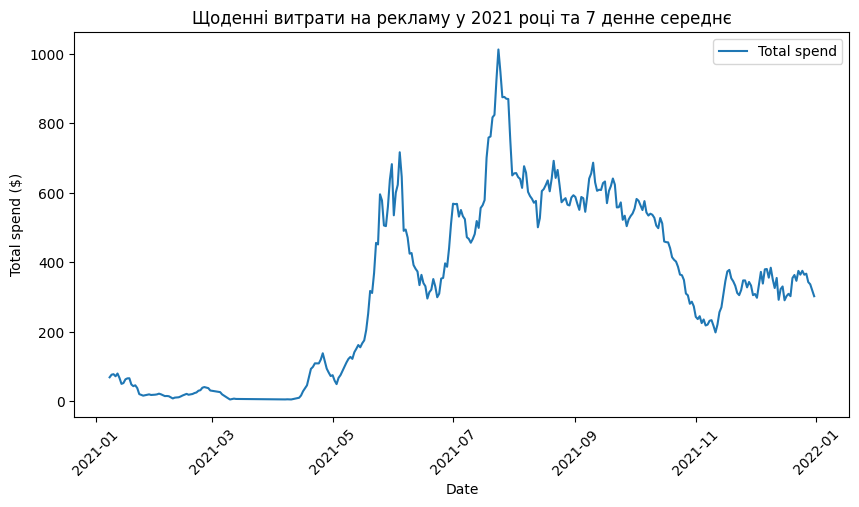

In [165]:
# Перетворюємо 'ad_date' у datetime
df['ad_date'] = pd.to_datetime(df['ad_date'], errors='coerce')

# Фільтруємо лише 2021 рік
df_2021 = df[df['ad_date'].dt.year == 2021]

# Групуємо дані за днями та сумуємо значення
daily_stat = df_2021.groupby('ad_date')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stat = daily_stat.reset_index()

# Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(daily_stat['ad_date'], daily_stat['total_spend'], label='Total spend')

# Оформлення графіка
plt.xlabel("Date")
plt.ylabel("Total spend ($)")
plt.title("Щоденні витрати на рекламу у 2021 році")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Відображаємо графік
plt.show()



plt.figure(figsize=(10, 5))
plt.plot(daily_stat['ad_date'], daily_stat['total_spend'].rolling(7).mean(), label='Total spend')


plt.xlabel("Date")
plt.ylabel("Total spend ($)")
plt.title("Щоденні витрати на рекламу у 2021 році та 7 денне середнє")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.show()

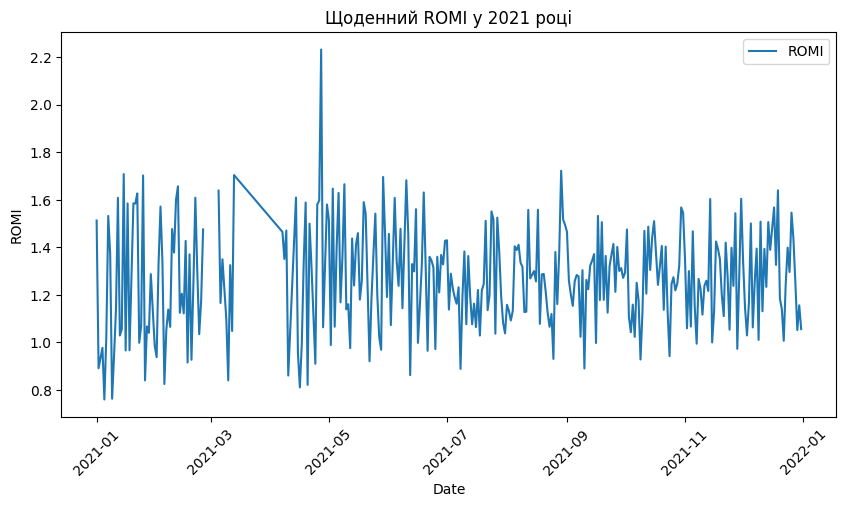

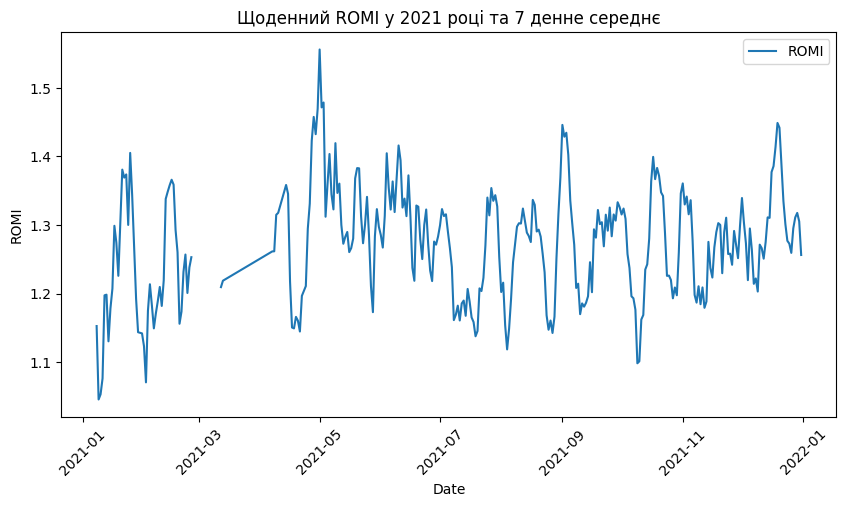

In [166]:
# Розрахунок romi
daily_stat['romi'] = daily_stat['total_value'] /  daily_stat['total_spend']

# Побудова графіка
plt.figure(figsize=(10, 5))
plt.plot(daily_stat['ad_date'], daily_stat['romi'], label='ROMI')

# Оформлення графіка
plt.xlabel("Date")
plt.ylabel("ROMI")
plt.title("Щоденний ROMI у 2021 році")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Відображаємо графік
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(daily_stat['ad_date'], daily_stat['romi'].rolling(7).mean(), label='ROMI')

plt.xlabel("Date")
plt.ylabel("ROMI")
plt.title("Щоденний ROMI у 2021 році та 7 денне середнє")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.show()

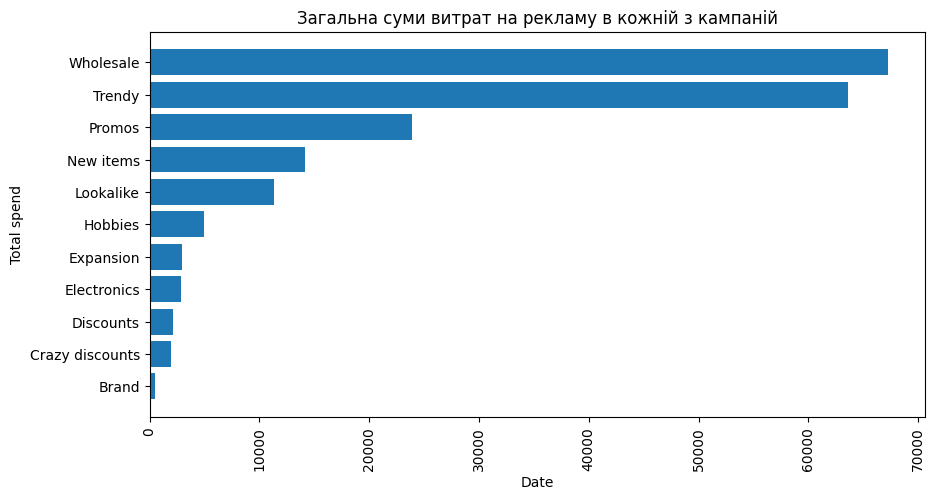

In [169]:
# Групуємо дані за назвою кампанії та сумуємо значення
daily_stat = df.groupby('campaign_name')[['total_spend', 'total_impressions', 'total_clicks', 'total_value']].sum()
daily_stat = daily_stat.reset_index()

plt.figure(figsize=(10, 5))
plt.barh(daily_stat['campaign_name'], daily_stat.sort_values('total_spend')['total_spend'])

plt.xlabel("Date")
plt.ylabel("Total spend")
plt.title("Загальна суми витрат на рекламу в кожній з кампаній")
plt.xticks(rotation=90)

plt.show()

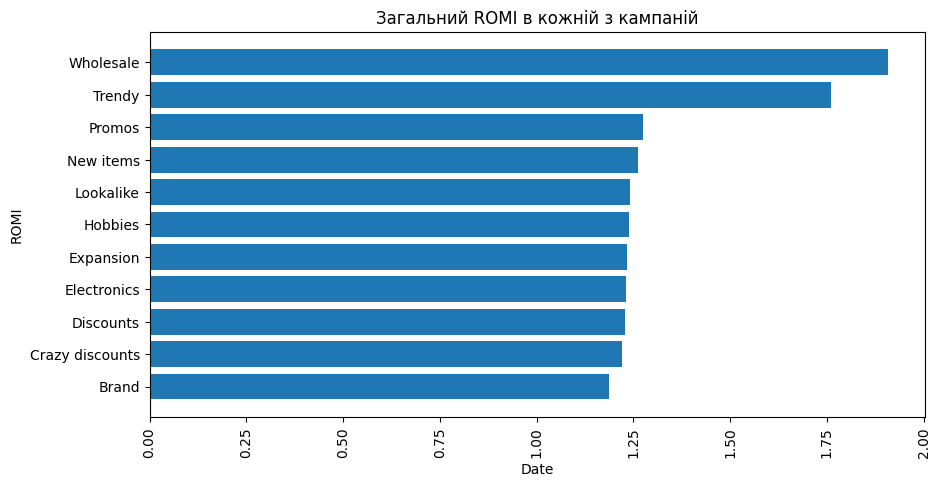

In [170]:
# Розрахунок romi
daily_stat['romi'] = daily_stat['total_value'] /  daily_stat['total_spend']

plt.figure(figsize=(10, 5))
plt.barh(daily_stat['campaign_name'], daily_stat.sort_values('romi')['romi'])

plt.xlabel("Date")
plt.ylabel("ROMI")
plt.title("Загальний ROMI в кожній з кампаній")
plt.xticks(rotation=90)

plt.show()

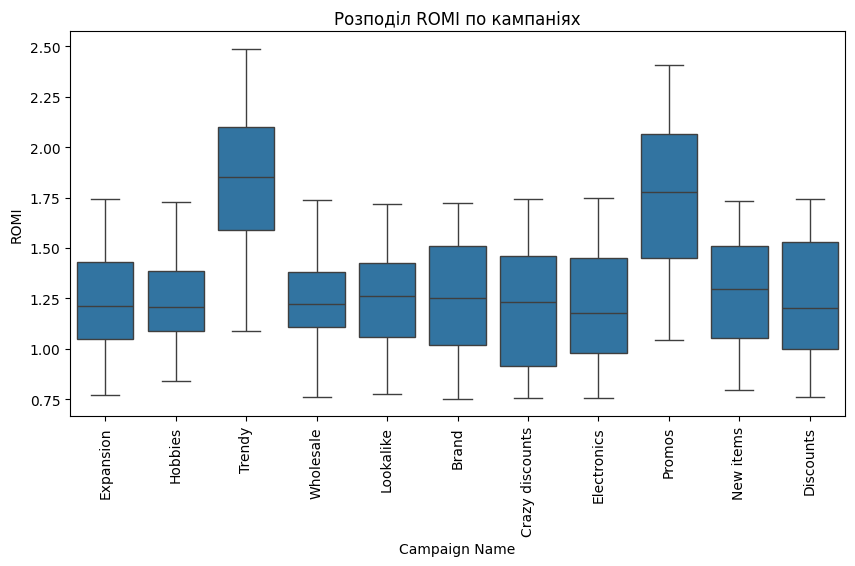

In [172]:
# Розрахунок ROMI
daily_stat['romi'] = daily_stat['total_value'] / daily_stat['total_spend']

plt.figure(figsize=(10, 5))
sns.boxplot(x='campaign_name', y='romi', data=df)

plt.xlabel("Campaign Name")
plt.ylabel("ROMI")
plt.title("Розподіл ROMI по кампаніях")
plt.xticks(rotation=90)

plt.show()

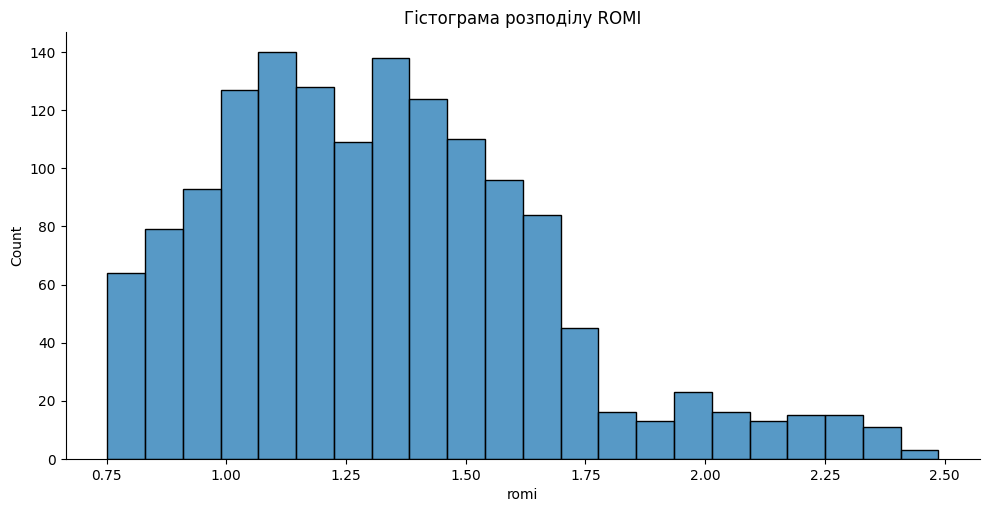

In [173]:
sns.displot(data=df, x='romi', height=5, aspect=2)
plt.title("Гістограма розподілу ROMI")

plt.show()

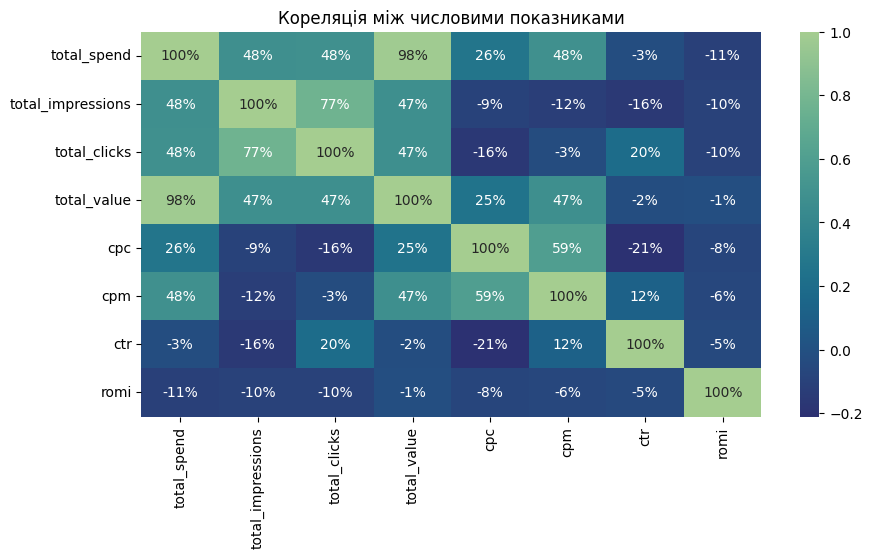

In [174]:
all_indicators_corr = df.loc[:, 'total_spend':].corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(10, 5))
sns.heatmap(all_indicators_corr, annot=True, fmt='.0%', cmap='crest_r')

plt.title("Кореляція між числовими показниками")

plt.show()

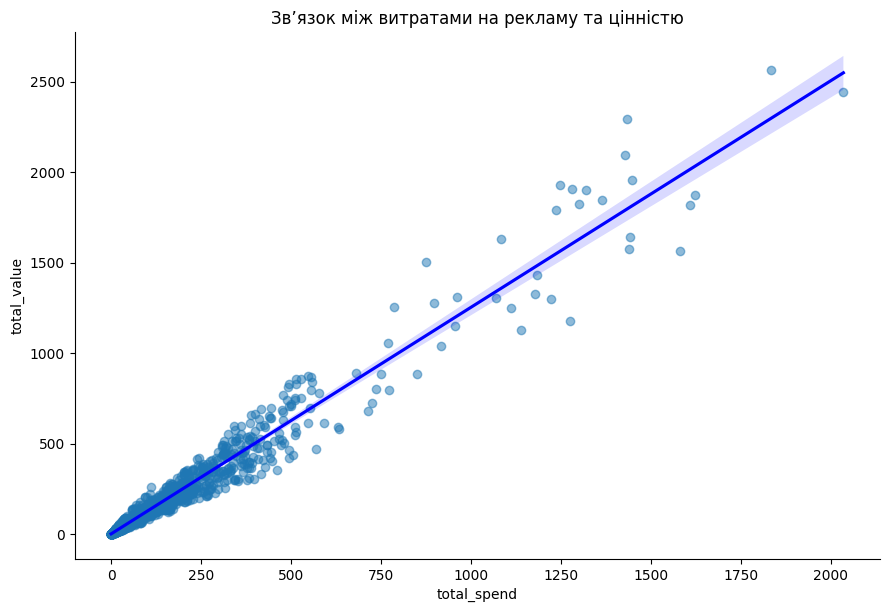

In [175]:
# Побудова точкової діаграми з лінійною регресією
sns.lmplot(data=df, x='total_spend', y='total_value', height=6, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})

plt.title("Зв’язок між витратами на рекламу та цінністю")

plt.show()